In [1]:
#Rod Ta
#10/16

In [2]:
from sklearn import tree
import pandas as pd
import numpy as np
import graphviz 

In [3]:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)

iris.tail()

ID = iris.iloc[:,0:4].values
ITemp = iris.iloc[:,4:5].values

for i in range (0,150):
    if ITemp[i] == 'Iris-setosa':
        ITemp[i] = 0
    elif ITemp[i] == 'Iris-versicolor':
        ITemp[i] = 1
    else:
        ITemp[i] = 2
        
IT = []

for i in range (0,150):
    IT.append(ITemp[i][0])
        
IT = np.asarray(IT)  

IF = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
IN = ['setosa', 'versicolor', 'virginica']
        
clf = tree.DecisionTreeClassifier()
clf = clf.fit(ID, IT)

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

print (IF)
print (IN)
print (clf)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa', 'versicolor', 'virginica']
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


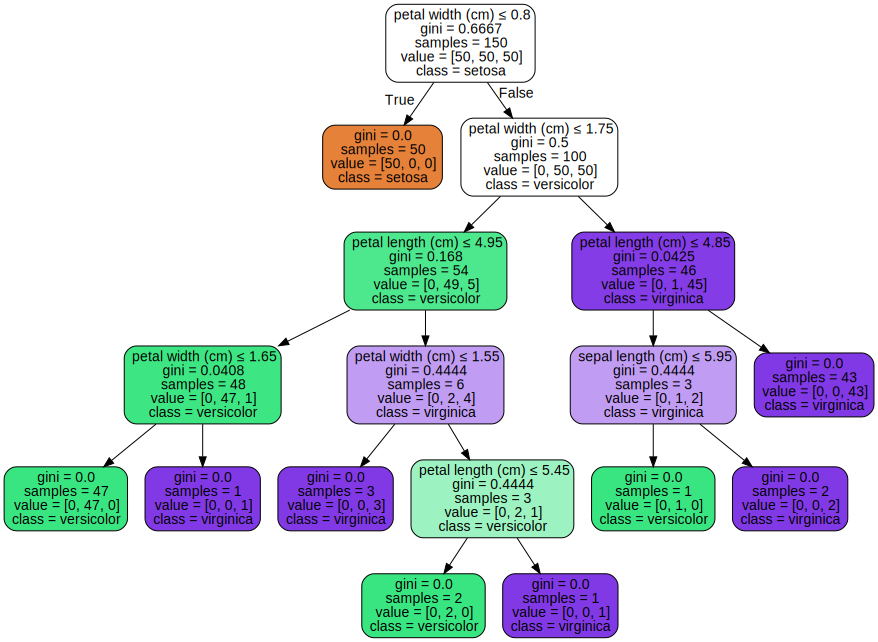

In [4]:
dot_data = tree.export_graphviz(clf,out_file=None,feature_names=IF,class_names=IN,filled=True,rounded=True,special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

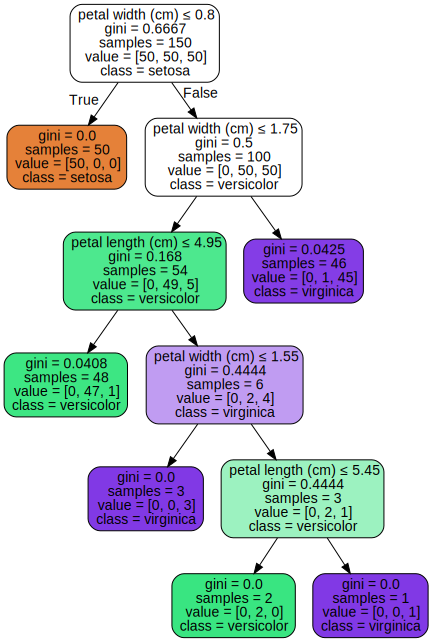

In [5]:
clf = tree.DecisionTreeClassifier(min_impurity_split=0.1)
clf = clf.fit(ID, IT)

dot_data = tree.export_graphviz(clf,out_file=None,feature_names=IF,class_names=IN,filled=True,rounded=True,special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 



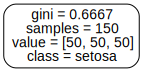

In [6]:
clf = tree.DecisionTreeClassifier(min_impurity_split=0.9)
clf = clf.fit(ID, IT)

dot_data = tree.export_graphviz(clf,out_file=None,feature_names=IF,class_names=IN,filled=True,rounded=True,special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [7]:
#I changed the min_impurity split and noticed that the change of value in parameter makes a difference in results
#The values for the parameters I used are 0, 0.1 and 0.9.
#I noticed that the higher the min_impurity_split value is, the smaller the tree.

#When the value is 0, the tree has a depth of 6, and it includes 3 classifications: petal length, petal width, and
#Sepal length

#When the value is 0.1, the tree also have a depth of 6 but it has less nodes and only 2 classifications: petal width
#and petal length

#When the value is 0.9, the tree only has its root.